<a href="https://colab.research.google.com/github/piaseckazaneta/data-science-bootcamp/blob/main/appstore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.__version__

'2.1.4'

Załadowanie danych

In [2]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/appstore_games.csv'
df_raw = pd.read_csv(url)
df_raw.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


Wstępne przygotowanie danych - preprocessing - wstępne kroki, żeby przygotować się do pracy z ramką danych

In [3]:
df_raw.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [4]:
# Kopiujemy obiekt df_raw, żeby mieć go cały czas w niezmienionej formie

df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

In [5]:
# Usuwanie kolumn - drop - przekazujemy nazwy kolumn jako listę

df = df.drop(columns = ['URL', 'Icon URL', 'Subtitle', 'Description', 'In-app Purchases'])
df.head()

,ID,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [6]:
# Ustawiamy indeks dla tabeli

df = df.set_index('ID')
df.head()

,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
ID,,,,,,,,,,,,
284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [7]:
# Wyświetlamy sobie statystyki df - wyświetlane są tylko dla wartości numerycznych - float i int
df.describe()

,Average User Rating,User Rating Count,Price,Size
count,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,4.060905,3.306531e+03,0.813419,1.157064e+08
std,0.751428,4.232256e+04,7.835732,2.036477e+08
min,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,4.500000,3.090000e+02,0.000000,1.330271e+08
max,5.000000,3.032734e+06,179.990000,4.005591e+09


In [8]:
# Można użyć metody describe też do danych typu object (tych nienumerycznch, tekstowych)
df.describe(include=['object'])

,Name,Developer,Age Rating,Languages,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,17007,17007,17007,16947,17007,17007,17007,17007
unique,16847,8693,4,990,21,1004,3084,2512
top,Additions,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,Games,"Games, Strategy, Puzzle",2/09/2016,1/08/2019
freq,2,123,11806,12467,16286,778,75,118


In [9]:
#Można tę tabelę ze statystykami transponować, wtedy są czytelniejsze
df.describe(include=['object']).T

,count,unique,top,freq
Name,17007,16847,Additions,2
Developer,17007,8693,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,123
Age Rating,17007,4,4+,11806
Languages,16947,990,EN,12467
Primary Genre,17007,21,Games,16286
Genres,17007,1004,"Games, Strategy, Puzzle",778
Original Release Date,17007,3084,2/09/2016,75
Current Version Release Date,17007,2512,1/08/2019,118


In [10]:
# Standaryzacja danych - zamiana duzycg liter kolumn na małe, podkreśliki w nazwach

df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.head().T

ID,284921427,284926400,284946595,285755462,285831220
name,Sudoku,Reversi,Morocco,Sudoku (Free),Senet Deluxe
average_user_rating,4.0,3.5,3.0,3.5,3.5
user_rating_count,3553.0,284.0,8376.0,190394.0,28.0
price,2.99,1.99,0.0,0.0,2.99
developer,Mighty Mighty Good Games,Kiss The Machine,Bayou Games,Mighty Mighty Good Games,RoGame Software
age_rating,4+,4+,4+,4+,4+
languages,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",EN,EN,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...","DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU..."
size,15853568.0,12328960.0,674816.0,21552128.0,34689024.0
primary_genre,Games,Games,Games,Games,Games
genres,"Games, Strategy, Puzzle","Games, Strategy, Board","Games, Board, Strategy","Games, Strategy, Puzzle","Games, Strategy, Board, Education"


Jak zbadać rozkład zmiennej?

In [11]:
df.head(2)

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
ID,,,,,,,,,,,,
284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018


In [12]:
# Sprawdzamy najczęściej występujący typ aplikacji - metoda 'kropki' / metoda 'value counts'

df.primary_genre.value_counts() # najczęściej występującym typem są gry

,count
primary_genre,
Games,16286
Education,222
Entertainment,198
Utilities,77
Sports,60
Reference,32
Stickers,29
Finance,18
Business,16


In [14]:
# Wyodrębnienie 5 najbardziej popularnych gatunków

df.primary_genre.value_counts().nlargest(5)

,count
primary_genre,
Games,16286
Education,222
Entertainment,198
Utilities,77
Sports,60


In [15]:
# Wyodrębnienie samych nazw gatunków, bez częstości występowania

df.primary_genre.value_counts().nlargest(5).index

Index(['Games', 'Education', 'Entertainment', 'Utilities', 'Sports'], dtype='object', name='primary_genre')

In [16]:
# Jeżeli z powyższego chcemy zrobić z tego listę, to konwertujemy to na listę w języku python

list(df.primary_genre.value_counts().nlargest(5).index)

['Games', 'Education', 'Entertainment', 'Utilities', 'Sports']

In [18]:
# Teraz badamy rozkład innej zmiennej 'age_rating'

df.age_rating.value_counts() #dane kategoryczne, ale pandas odczytał je jako liczby całkowite

,count
age_rating,
4+,11806
9+,2481
12+,2055
17+,665


In [19]:
# Stworzymy teraz wykres korzystając z pandas

type(df.age_rating.value_counts()) #obiekt typu Series

pandas.core.series.Series

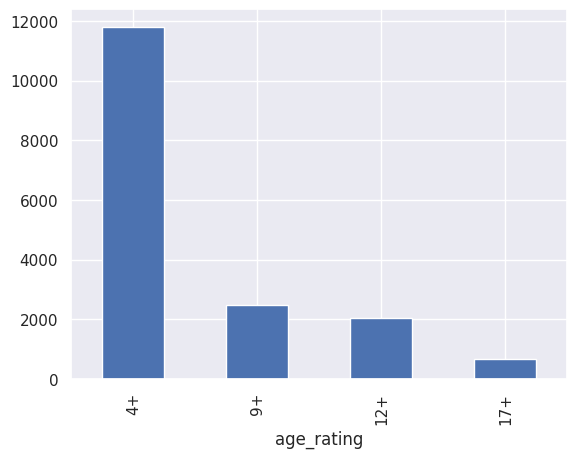

In [22]:
import seaborn as sns
sns.set()

_ = df.age_rating.value_counts().plot(kind="bar") #wykres słupkowy

In [24]:
# Kolejna zmienna

df.price.value_counts()

,count
price,
0.00,14212
0.99,1078
1.99,515
2.99,471
4.99,237
3.99,163
9.99,88
11.99,59
5.99,42


In [26]:
df.languages.value_counts()

,count
languages,
EN,12467
"EN, ZH",354
"CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV, ZH, TR",277
"EN, ZH, ZH",248
"EN, DE",147
...,...
"DA, NL, EN, FI, FR, DE, IT, JA, KO, NO, PL, PT, RU, ZH, ES, SV, ZH, TR, UK",1
"EN, FR, IT, JA, KO, PT, RU, ES, TR",1
"DA, NL, EN, FR, DE, IT, NB, PL, PT, ZH, ES, SV, ZH, TR",1


In [28]:
# Chcemy się dowiedzieć, ile języków jest dostępnych w każdej aplikacji - praca z tekstem

df.languages.str.split(', ') # najpierw podzielimy nasz tekst wg przecinków i spacji i zrobimy z nich listę elementów

df.languages.str.split(', ').str.len()

,languages
ID,
284921427,17.0
284926400,1.0
284946595,1.0
285755462,17.0
285831220,15.0
...,...
1474626442,1.0
1474919257,1.0
1474962324,1.0


In [29]:
# Możemy dodać informację o liczbie języków do naszej df

df['num_lang'] = df.languages.str.split(', ').str.len()
df.head()

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date,num_lang
ID,,,,,,,,,,,,,
284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,17.0
284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,1.0
284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,1.0
285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,17.0
285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,15.0


In [30]:
# Badamy rozkład, ile jest aplikacji z daną liczbą jezykow

df.num_lang.value_counts()

,count
num_lang,
1.0,12566
2.0,1102
3.0,495
16.0,316
4.0,261
5.0,247
6.0,220
25.0,171
9.0,154


Sprawdzanie braków danych

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17007 entries, 284921427 to 1475076711
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          17007 non-null  object 
 1   average_user_rating           7561 non-null   float64
 2   user_rating_count             7561 non-null   float64
 3   price                         16983 non-null  float64
 4   developer                     17007 non-null  object 
 5   age_rating                    17007 non-null  object 
 6   languages                     16947 non-null  object 
 7   size                          17006 non-null  float64
 8   primary_genre                 17007 non-null  object 
 9   genres                        17007 non-null  object 
 10  original_release_date         17007 non-null  object 
 11  current_version_release_date  17007 non-null  object 
 12  num_lang                      16947 non-null  float6

In [33]:
# Na górze w info widać, że obieków jest 17007 i niektóre z atrybutów mają braki w danych,bo mają liczbę elementów mniejszą niż 17007

#Badamy braki w danych przykładowej zmiennej

df.average_user_rating.value_counts() # nie daje informacji o brakach danych
df.average_user_rating.value_counts(dropna=False) # daje informacje o brakach w danych


,count
average_user_rating,
NaN,9446
4.5,2861
4.0,1722
5.0,990
3.5,925
3.0,514
2.5,317
2.0,158
1.5,60


In [35]:
# Jak sprawdzić, gdzie mamy braki w danych

df.isnull().sum() #dla każdej kolumny zwróći nam liczbę braków

,0
name,0
average_user_rating,9446
user_rating_count,9446
price,24
developer,0
age_rating,0
languages,60
size,1
primary_genre,0
genres,0


In [36]:
# Jak usunąć te braki?

df = df.dropna() #metoda usuwa cały wiersz, jeśli jest gdzieś brak danych
df.isnull().sum()

,0
name,0
average_user_rating,0
user_rating_count,0
price,0
developer,0
age_rating,0
languages,0
size,0
primary_genre,0
genres,0


In [37]:
df.info() # wszędzie już mamy 7537, więc tyle obiektów miało komplet danych

<class 'pandas.core.frame.DataFrame'>
Index: 7537 entries, 284921427 to 1474461379
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          7537 non-null   object 
 1   average_user_rating           7537 non-null   float64
 2   user_rating_count             7537 non-null   float64
 3   price                         7537 non-null   float64
 4   developer                     7537 non-null   object 
 5   age_rating                    7537 non-null   object 
 6   languages                     7537 non-null   object 
 7   size                          7537 non-null   float64
 8   primary_genre                 7537 non-null   object 
 9   genres                        7537 non-null   object 
 10  original_release_date         7537 non-null   object 
 11  current_version_release_date  7537 non-null   object 
 12  num_lang                      7537 non-null   float64

In [ ]:
# Co można robić z brakami w danych?

#W zależności od problemu, można:

# - usunąć obiekty z brakami
# - interpolować warotści brakujące
# - szacować wartości uzywając modelu
# - obliczyć średnie wartości korzystając z istniejacych danych